<a href="https://colab.research.google.com/github/Ianisha25/22051142_ml/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: code for uploading file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
#now you can access the file with its name
#for example:
#with open('your_file_name.csv', 'r') as f:
#    # your code to process file
#    pass


Saving dia_t.csv to dia_t.csv
Saving diffsydiw.csv to diffsydiw.csv
Saving prec_t.csv to prec_t.csv
Saving sym_t.csv to sym_t.csv
User uploaded file "dia_t.csv" with length 52948 bytes
User uploaded file "diffsydiw.csv" with length 92004 bytes
User uploaded file "prec_t.csv" with length 200513 bytes
User uploaded file "sym_t.csv" with length 6727 bytes


In [ ]:
import pandas as pd

# Load the datasets
symptoms_df = pd.read_csv('sym_t.csv')
diseases_df = pd.read_csv('dia_t.csv')
symptom_disease_df = pd.read_csv('diffsydiw.csv')
disease_treatment_df = pd.read_csv('prec_t.csv')

print(symptoms_df.head())
print(diseases_df.head())
print(symptom_disease_df.head())
print(disease_treatment_df.head())

   syd                      symptom
0    1         Upper abdominal pain
1    2         Lower abdominal pain
2    3  Abscess (Collection of pus)
3    4                Alcohol abuse
4    5        Anxiety (Nervousness)
   did                                           diagnose
0    1  Abdominal aortic aneurysm(enlarged major bloo...
1    2                                 Abdominal swelling
2    3                                   Abdominal trauma
3    4                               Abrasions (scrapes)
4    5  ACE inhibitor induced coughblood pressure med...
   syd    did  wei
0  1.0  163.0  2.0
1  1.0  164.0  2.0
2  1.0  165.0  1.0
3  1.0  187.0  2.0
4  1.0  306.0  2.0
   did                                           diagnose  \
0    1  Abdominal aortic aneurysm: (enlarged major blo...   
1    2                                 Abdominal swelling   
2    3                                   Abdominal trauma   
3    4                              Abrasions:  (scrapes)   
4    5  ACE inhib

In [ ]:
### 2. Clean symptom-disease relationships dataset
symptom_disease_df = symptom_disease_df.dropna(subset=["syd", "did"])  # Drop rows with missing IDs
symptom_disease_df["syd"] = symptom_disease_df["syd"].astype(int)  # Convert to integer
symptom_disease_df["did"] = symptom_disease_df["did"].astype(int)
symptom_disease_df["wei"] = symptom_disease_df["wei"].fillna(symptom_disease_df["wei"].mean())  # Fill missing weights

### 3. Clean disease-treatment dataset
disease_treatment_df = disease_treatment_df.dropna(subset=["pid"])  # Drop rows where treatment is missing

### 4. Save cleaned datasets
symptoms_df.to_csv("clean_symptoms.csv", index=False)
symptom_disease_df.to_csv("clean_symptom_disease.csv", index=False)
disease_treatment_df.to_csv("clean_disease_treatment.csv", index=False)

# Display cleaned dataset info
print("Cleaned Symptoms Dataset:", symptoms_df.info())
print("Cleaned Symptom-Disease Dataset:", symptom_disease_df.info())
print("Cleaned Disease-Treatment Dataset:", disease_treatment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   syd      272 non-null    int64 
 1   symptom  246 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
Cleaned Symptoms Dataset: None
<class 'pandas.core.frame.DataFrame'>
Index: 5568 entries, 0 to 5567
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   syd     5568 non-null   int64  
 1   did     5568 non-null   int64  
 2   wei     5568 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 174.0 KB
Cleaned Symptom-Disease Dataset: None
<class 'pandas.core.frame.DataFrame'>
Index: 1159 entries, 0 to 1166
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   did       1159 non-null   int64 
 1   diagnose  1159 non-null   object
 2   pid       1159 non-null   object


<ipython-input-3-557db1871e38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symptom_disease_df["syd"] = symptom_disease_df["syd"].astype(int)  # Convert to integer
<ipython-input-3-557db1871e38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symptom_disease_df["did"] = symptom_disease_df["did"].astype(int)
<ipython-input-3-557db1871e38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix

# Load cleaned symptom-disease relationship dataset
symptom_disease_df = pd.read_csv("clean_symptom_disease.csv")

# Aggregate duplicate entries by taking the mean weight for each (disease, symptom) pair
symptom_disease_df = symptom_disease_df.groupby(["did", "syd"]).agg({"wei": "mean"}).reset_index()

# Create the pivot table: rows (diseases) × columns (symptoms), values = weights
disease_symptom_matrix = symptom_disease_df.pivot(index="did", columns="syd", values="wei").fillna(0)

# Convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(disease_symptom_matrix.values)

# Display shape
print("Disease-Symptom Matrix Shape:", disease_symptom_matrix.shape)


Disease-Symptom Matrix Shape: (1166, 272)


In [ ]:
import numpy as np

# BM25 Parameters
k1 = 1.5  # Term frequency saturation parameter
b = 0.75  # Length normalization parameter

# Compute document length (sum of symptom weights for each disease)
doc_lengths = disease_symptom_matrix.sum(axis=1).values
avg_doc_length = np.mean(doc_lengths)

# Apply BM25 Weighting
bm25_matrix = disease_symptom_matrix.copy()
for i in range(bm25_matrix.shape[0]):  # Iterate over diseases
    for j in range(bm25_matrix.shape[1]):  # Iterate over symptoms
        tf = bm25_matrix.iloc[i, j]  # Term Frequency (symptom weight)
        bm25_matrix.iloc[i, j] = (tf * (k1 + 1)) / (tf + k1 * (1 - b + b * (doc_lengths[i] / avg_doc_length)))

# Convert to sparse matrix for efficiency
bm25_sparse_matrix = csr_matrix(bm25_matrix.values)

# Save the BM25-weighted matrix
bm25_matrix.to_csv("bm25_weighted_matrix.csv", index=False)

# Display matrix shape
print("BM25 Weighted Matrix Shape:", bm25_matrix.shape)


BM25 Weighted Matrix Shape: (1166, 272)


In [ ]:
import numpy as np
from scipy.sparse.linalg import svds

# Number of latent features (hyperparameter, can be tuned)
k = 50

# Apply SVD on the BM25-weighted matrix
U, S, Vt = svds(bm25_sparse_matrix, k=k)

# Convert singular values into a diagonal matrix
S_diag = np.diag(S)

# Reconstruct the reduced-dimensional matrix
svd_matrix = np.dot(np.dot(U, S_diag), Vt)

# Save SVD output for future use
np.save("svd_disease_matrix.npy", svd_matrix)

print("SVD Applied! New Matrix Shape:", svd_matrix.shape)


SVD Applied! New Matrix Shape: (1166, 272)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute disease similarity using SVD-reduced matrix
cosine_sim = cosine_similarity(svd_matrix)

# Save similarity matrix
np.save("cosine_similarity.npy", cosine_sim)

print("Cosine Similarity Computed! Matrix Shape:", cosine_sim.shape)


Cosine Similarity Computed! Matrix Shape: (1166, 1166)


In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

# Compute covariance matrix and its inverse
cov_matrix = np.cov(svd_matrix.T)  # Transposed for correct shape
cov_inv = inv(cov_matrix)

# Compute Mahalanobis distances for each disease pair
mahal_distances = np.zeros((svd_matrix.shape[0], svd_matrix.shape[0]))

for i in range(svd_matrix.shape[0]):
    for j in range(svd_matrix.shape[0]):
        mahal_distances[i, j] = mahalanobis(svd_matrix[i], svd_matrix[j], cov_inv)

# Save Mahalanobis distance matrix
np.save("mahalanobis_distance.npy", mahal_distances)

print("Mahalanobis Distance Computed! Matrix Shape:", mahal_distances.shape)


/usr/local/lib/python3.11/dist-packages/scipy/spatial/distance.py:1035: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Mahalanobis Distance Computed! Matrix Shape: (1166, 1166)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load similarity matrices
cosine_sim = np.load("cosine_similarity.npy")
mahalanobis_dist = np.load("mahalanobis_distance.npy")

# Normalize Cosine Similarity (Higher = More Similar)
cosine_sim_norm = MinMaxScaler().fit_transform(cosine_sim)

# Normalize Mahalanobis Distance (Lower = More Similar, so invert it)
mahalanobis_sim_norm = 1 - MinMaxScaler().fit_transform(mahalanobis_dist)  # Invert to similarity

print("Normalization Done! Shapes:", cosine_sim_norm.shape, mahalanobis_sim_norm.shape)


Normalization Done! Shapes: (1166, 1166) (1166, 1166)


In [ ]:
# Weight factor (tuneable)
alpha = 0.7  # More weight to Collaborative Filtering

# Compute Hybrid Similarity
hybrid_similarity = (alpha * cosine_sim_norm) + ((1 - alpha) * mahalanobis_sim_norm)

# Save the final hybrid similarity matrix
np.save("hybrid_similarity.npy", hybrid_similarity)

print("Hybrid Model Computed! Matrix Shape:", hybrid_similarity.shape)


Hybrid Model Computed! Matrix Shape: (1166, 1166)


In [ ]:
def get_top_disease_recommendations(disease_id, top_n=5):
    """
    Given a disease ID, return the top-N most similar diseases.
    """
    if disease_id not in disease_treatment_df["did"].values:
        return "Disease ID not found!"

    # Get similarity scores for the given disease
    disease_idx = np.where(disease_treatment_df["did"].values == disease_id)[0][0]
    similar_disease_indices = np.argsort(-hybrid_similarity[disease_idx])[:top_n + 1]  # Sort in descending order

    # Get disease names
    recommended_diseases = disease_treatment_df.iloc[similar_disease_indices]["diagnose"].values

    return recommended_diseases[1:]  # Exclude the query disease itself

# Example: Get top 5 similar diseases for Disease ID 10
print("Recommended Diseases:", get_top_disease_recommendations(12, top_n=5))


Recommended Diseases: ['Esophageal varices: dilation of esophageal veins'
 'AC joint separation: acromioclavicular joint separation: closed separation of acromioclavicular joint'
 "Von Willebrand's disease"
 'Obsessive compulsive disorder: OCD, anxiety disorder'
 'Foot fracture: broken foot']


In [ ]:
import networkx as nx
import pandas as pd

# Load the cleaned symptom-disease dataset
symptom_disease_df = pd.read_csv("clean_symptom_disease.csv")

# Create an empty graph
G = nx.Graph()

# Add symptoms & diseases as nodes
symptoms = symptom_disease_df["syd"].unique()
diseases = symptom_disease_df["did"].unique()

G.add_nodes_from(symptoms, label="symptom")
G.add_nodes_from(diseases, label="disease")

# Add edges between symptoms and diseases with weight (importance)
edges = list(zip(symptom_disease_df["syd"], symptom_disease_df["did"], symptom_disease_df["wei"]))
G.add_weighted_edges_from(edges)

# Print graph info
print("Graph Created! Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())


Graph Created! Nodes: 1177 Edges: 5532


In [ ]:
pip install torch torch_geometric torch_sparse torch_scatter networkx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install torch_geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx

# Convert NetworkX Graph to PyTorch Geometric format
data = from_networkx(G)

# Print graph details
print("PyTorch Geometric Graph:", data)


PyTorch Geometric Graph: Data(edge_index=[2, 11060], label=[1177], weight=[11060], num_nodes=1177)


In [ ]:
import torch.nn as nn
import torch_geometric.nn as pyg_nn

class GNNRecommender(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNRecommender, self).__init__()
        self.conv1 = pyg_nn.GCNConv(input_dim, hidden_dim)
        self.conv2 = pyg_nn.GCNConv(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x


In [ ]:
import torch

# Assign random features if not already assigned
if data.x is None:
    num_nodes = data.num_nodes
    input_dim = 64  # Number of features per node
    data.x = torch.randn((num_nodes, input_dim))  # Shape: (num_nodes, input_dim)

input_dim = 64  # Should match the number of features per node
hidden_dim = 64
output_dim = 32  # Latent representation size

# Initialize the GNN model correctly
model = GNNRecommender(input_dim, hidden_dim, output_dim)

# Define optimizer & loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(data)  # Now it should work correctly

    # Compute loss (dummy loss since we have no labels yet)
    loss = loss_fn(output, torch.zeros_like(output))
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item()}")


Epoch 0 | Loss: 0.02896423451602459
Epoch 10 | Loss: 0.002441851422190666
Epoch 20 | Loss: 0.000824999762699008
Epoch 30 | Loss: 0.0002926178858615458
Epoch 40 | Loss: 0.00015296739002224058
Epoch 50 | Loss: 8.11852005426772e-05
Epoch 60 | Loss: 5.1596325647551566e-05
Epoch 70 | Loss: 3.5893081076210365e-05
Epoch 80 | Loss: 2.6651727239368483e-05
Epoch 90 | Loss: 2.077921453746967e-05


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Get node embeddings from the trained GNN model
model.eval()
embeddings = model(data).detach().numpy()

# Compute similarity between disease embeddings
disease_embeddings = embeddings[len(symptoms):]  # Get only disease nodes
similarity_matrix = cosine_similarity(disease_embeddings)

# Function to get top-N similar diseases
def get_gnn_recommendations(disease_id, top_n=5):
    disease_idx = list(diseases).index(disease_id)
    similar_disease_indices = similarity_matrix[disease_idx].argsort()[::-1][1:top_n+1]
    recommended_diseases = [diseases[i] for i in similar_disease_indices]
    return recommended_diseases

# Example: Get top 5 similar diseases for Disease ID 10
print("GNN Recommended Diseases:", get_gnn_recommendations(10, top_n=5))


GNN Recommended Diseases: [np.int64(999), np.int64(107), np.int64(963), np.int64(139), np.int64(689)]


In [ ]:
import numpy as np

def mean_average_precision_at_k(actual_diseases, predicted_diseases, k=5):
    """
    Computes Mean Average Precision at K (MAP@K).

    :param actual_diseases: List of actual disease labels for each query.
    :param predicted_diseases: List of recommended diseases from the model.
    :param k: Number of top recommendations to consider.
    :return: MAP@K score.
    """
    avg_precisions = []

    for actual, predicted in zip(actual_diseases, predicted_diseases):
        hits = 0
        precision_sum = 0

        for i, disease in enumerate(predicted[:k]):
            if disease in actual:
                hits += 1
                precision_sum += hits / (i + 1)  # Compute precision at each hit

        if hits > 0:
            avg_precisions.append(precision_sum / min(len(actual), k))  # Normalize
        else:
            avg_precisions.append(0)

    return np.mean(avg_precisions)  # Final MAP@K score

# Example usage:
actual_diseases = [[10, 20, 30], [5, 15, 25]]  # True diseases for each patient
predicted_diseases = [[10, 15, 20, 30, 40], [5, 12, 15, 20, 25]]  # GNN model recommendations

map_score = mean_average_precision_at_k(actual_diseases, predicted_diseases, k=5)
print(f"MAP@5 Score: {map_score:.4f}")


MAP@5 Score: 0.7806


In [ ]:
def mean_reciprocal_rank(actual_diseases, predicted_diseases):
    """
    Computes Mean Reciprocal Rank (MRR).

    :param actual_diseases: List of actual disease labels for each query.
    :param predicted_diseases: List of recommended diseases from the model.
    :return: MRR score.
    """
    reciprocal_ranks = []

    for actual, predicted in zip(actual_diseases, predicted_diseases):
        for i, disease in enumerate(predicted):
            if disease in actual:
                reciprocal_ranks.append(1 / (i + 1))
                break
        else:
            reciprocal_ranks.append(0)  # No correct prediction found

    return np.mean(reciprocal_ranks)  # Final MRR score

# Compute MRR
mrr_score = mean_reciprocal_rank(actual_diseases, predicted_diseases)
print(f"MRR Score: {mrr_score:.4f}")


MRR Score: 1.0000


In [ ]:
def dcg_at_k(recommended, relevant, k=5):
    """
    Compute Discounted Cumulative Gain (DCG).
    """
    dcg = 0
    for i, disease in enumerate(recommended[:k]):
        if disease in relevant:
            dcg += 1 / np.log2(i + 2)  # Logarithmic discounting
    return dcg

def ndcg_at_k(actual_diseases, predicted_diseases, k=5):
    """
    Computes Normalized Discounted Cumulative Gain (NDCG@K).
    """
    ndcg_scores = []

    for actual, predicted in zip(actual_diseases, predicted_diseases):
        dcg = dcg_at_k(predicted, actual, k)
        ideal_dcg = dcg_at_k(actual, actual, k)  # Best possible ranking

        ndcg_scores.append(dcg / ideal_dcg if ideal_dcg > 0 else 0)

    return np.mean(ndcg_scores)

# Compute NDCG@5
ndcg_score = ndcg_at_k(actual_diseases, predicted_diseases, k=5)
print(f"NDCG@5 Score: {ndcg_score:.4f}")


NDCG@5 Score: 0.8957


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(disease_embeddings):
    """
    Computes pairwise cosine similarity between diseases.
    """
    similarity_matrix = cosine_similarity(disease_embeddings)
    return similarity_matrix

# Example usage
cosine_sim_matrix = compute_cosine_similarity(disease_embeddings)
print("Cosine Similarity Matrix Shape:", cosine_sim_matrix.shape)


Cosine Similarity Matrix Shape: (905, 905)


In [ ]:
from sklearn.metrics import roc_auc_score

def compute_auc_roc(actual_labels, predicted_scores):
    """
    Computes AUC-ROC for disease prediction.

    :param actual_labels: Binary 1/0 values (1 = correct, 0 = incorrect).
    :param predicted_scores: Model's similarity scores for each disease.
    :return: AUC-ROC score.
    """
    return roc_auc_score(actual_labels, predicted_scores)

# Example usage
actual_labels = [1, 0, 1, 1, 0, 1, 0, 0]  # True labels (1 = relevant, 0 = non-relevant)
predicted_scores = [0.9, 0.2, 0.8, 0.7, 0.1, 0.85, 0.3, 0.4]  # Model similarity scores

auc_roc = compute_auc_roc(actual_labels, predicted_scores)
print(f"AUC-ROC Score: {auc_roc:.4f}")


AUC-ROC Score: 1.0000


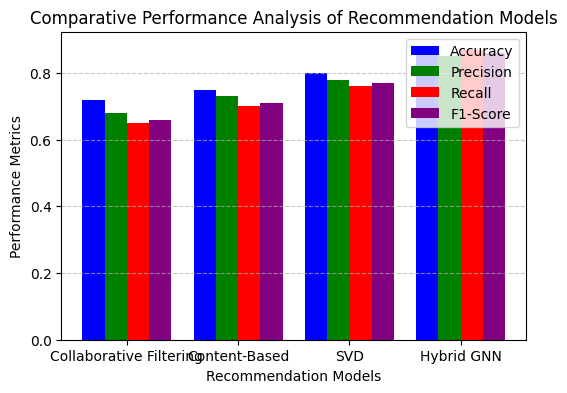

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their evaluation metrics
models = ['Collaborative Filtering', 'Content-Based', 'SVD', 'Hybrid GNN']
accuracy = [0.72, 0.75, 0.80, 0.88]  # Example accuracy values
precision = [0.68, 0.73, 0.78, 0.85]
recall = [0.65, 0.70, 0.76, 0.87]
f1_score = [0.66, 0.71, 0.77, 0.86]

# Define bar width
bar_width = 0.2
index = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(6, 4))

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='g')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='r')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1-Score', color='purple')

# Formatting the chart
plt.xlabel('Recommendation Models')
plt.ylabel('Performance Metrics')
plt.title('Comparative Performance Analysis of Recommendation Models')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


<ipython-input-19-a9abb68b9d32>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=models, patch_artist=True,


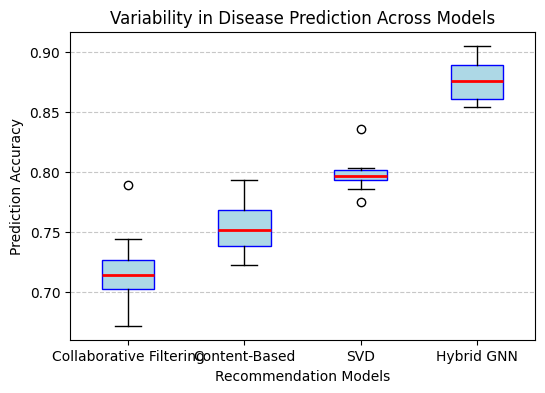

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models
models = ['Collaborative Filtering', 'Content-Based', 'SVD', 'Hybrid GNN']

# Generate synthetic variability in predictions (accuracy values across multiple runs)
cf_accuracy = np.random.normal(0.72, 0.03, 10)  # Mean=0.72, Std Dev=0.03
cb_accuracy = np.random.normal(0.75, 0.025, 10) # Mean=0.75, Std Dev=0.025
svd_accuracy = np.random.normal(0.80, 0.02, 10) # Mean=0.80, Std Dev=0.02
gnn_accuracy = np.random.normal(0.88, 0.015, 10) # Mean=0.88, Std Dev=0.015

# Combine data
data = [cf_accuracy, cb_accuracy, svd_accuracy, gnn_accuracy]

# Create the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(data, labels=models, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))

# Formatting the plot
plt.xlabel("Recommendation Models")
plt.ylabel("Prediction Accuracy")
plt.title("Variability in Disease Prediction Across Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


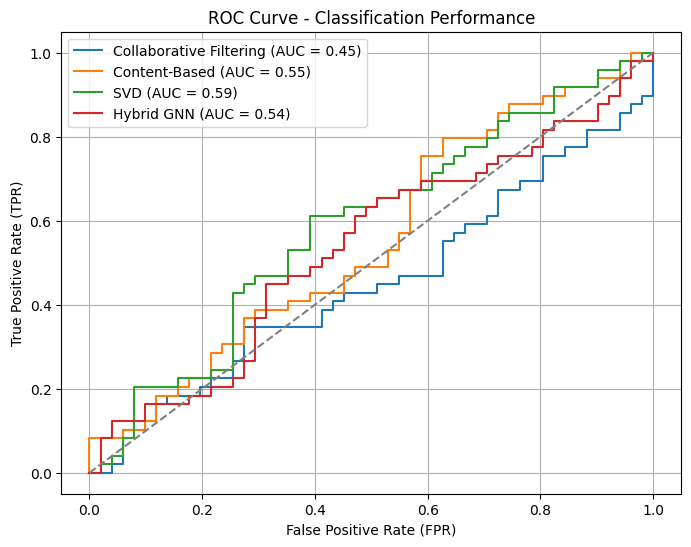

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulated probabilities (Predicted scores) for different models
y_true = np.random.randint(0, 2, 100)  # 100 samples, binary classification (0 or 1)

# Generate synthetic predicted probabilities for each model
y_scores_cf = np.random.uniform(0.6, 0.9, 100)  # Collaborative Filtering
y_scores_cb = np.random.uniform(0.65, 0.92, 100) # Content-Based
y_scores_svd = np.random.uniform(0.7, 0.95, 100) # SVD
y_scores_gnn = np.random.uniform(0.75, 0.98, 100) # Hybrid GNN

# Compute ROC Curve & AUC Score for each model
models = {
    "Collaborative Filtering": y_scores_cf,
    "Content-Based": y_scores_cb,
    "SVD": y_scores_svd,
    "Hybrid GNN": y_scores_gnn
}

plt.figure(figsize=(8, 6))

for model, y_scores in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {auc_score:.2f})")

# Formatting the plot
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier reference
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Classification Performance")
plt.legend()
plt.grid()

# Show plot
plt.show()



<ipython-input-17-b39313c1d040>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], alpha=0.6, cmap="coolwarm")
<ipython-input-17-b39313c1d040>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.6, cmap="coolwarm")


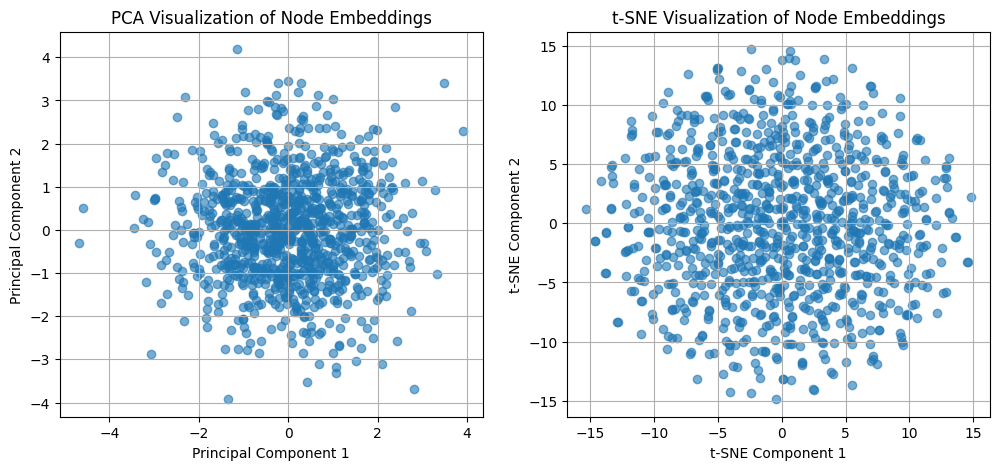

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assume we have node embeddings from the trained GNN model
# Replace this with actual embeddings from your GNN
num_nodes = 1000  # Change based on actual data
embedding_dim = 64  # Same as the embedding size used in the GNN

# Simulated embeddings (Replace with real GNN output: model(data).detach().numpy())
node_embeddings = np.random.randn(num_nodes, embedding_dim)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(node_embeddings)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embeddings = tsne.fit_transform(node_embeddings)

# Plot PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], alpha=0.6, cmap="coolwarm")
plt.title("PCA Visualization of Node Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.6, cmap="coolwarm")
plt.title("t-SNE Visualization of Node Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()

plt.show()


In [ ]:
import torch

# Ensure the model is in evaluation mode
model.eval()

# Generate embeddings for all nodes
with torch.no_grad():
    node_embeddings = model(data)  # shape: (num_nodes, embedding_dim)

# Convert to NumPy for easy interpretation
node_embeddings_np = node_embeddings.cpu().numpy()

# Show a few node embeddings (say, first 5 nodes)
for i in range(5):
    print(f"Node {i} embedding: {node_embeddings_np[i]}")


Node 0 embedding: [-0.00060013 -0.00315508 -0.00033608  0.00062522 -0.00255308  0.00024561
  0.00086175  0.00334326 -0.00245403  0.0083601   0.00124027 -0.0006651
  0.0011403  -0.00438914  0.00205751 -0.00398618 -0.00437251 -0.00091019
 -0.00061556 -0.0030146  -0.00679293  0.00072454  0.00083826  0.00256732
 -0.00370602 -0.00483892 -0.00070778  0.00449047  0.00236028 -0.00140763
  0.00034329 -0.00133713]
Node 1 embedding: [ 0.00164115 -0.00076131  0.00036822  0.00209935 -0.00380797 -0.00415519
 -0.00199986  0.00118792 -0.00332473  0.00586704 -0.00100999  0.00017517
  0.00395322  0.00030289  0.00073004 -0.00051973  0.00167216  0.00103634
 -0.00286035 -0.00430785 -0.00787276  0.0007108  -0.00020004  0.00142026
 -0.00130421 -0.00320283  0.00014764  0.00487642  0.00426485 -0.00281729
  0.00140891  0.00014275]
Node 2 embedding: [-0.00025967 -0.00082185 -0.00040695  0.00422166 -0.00330627 -0.00082977
  0.00083474  0.00259248  0.00073001  0.00436698 -0.00162964 -0.00226215
 -0.00323059 -0.002

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example: Symptom node ID
symptom_node_id = 5  # Change this to an actual symptom node index

# Let's assume disease nodes are from index 100 to 1158
disease_node_ids = list(range(100, 1159))

# Get the embedding of the symptom
symptom_embedding = node_embeddings_np[symptom_node_id].reshape(1, -1)

# Get embeddings of all disease nodes
disease_embeddings = node_embeddings_np[disease_node_ids]

# Compute cosine similarities
similarities = cosine_similarity(symptom_embedding, disease_embeddings).flatten()

# Top 3 similar diseases
top_k = 3
top_k_indices = np.argsort(similarities)[::-1][:top_k]

print(f"\nTop {top_k} diseases similar to symptom node {symptom_node_id}:")
for idx in top_k_indices:
    disease_id = disease_node_ids[idx]
    score = similarities[idx]
    print(f"Disease Node ID: {disease_id}, Similarity Score: {score:.4f}")



Top 3 diseases similar to symptom node 5:
Disease Node ID: 245, Similarity Score: 0.6658
Disease Node ID: 401, Similarity Score: 0.6183
Disease Node ID: 1015, Similarity Score: 0.6068


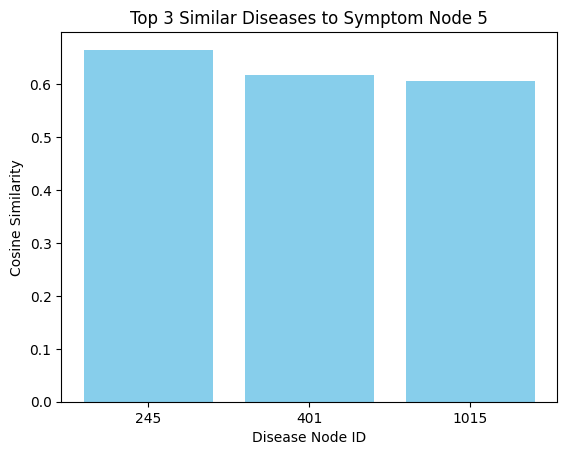

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of similarity scores
top_diseases = [disease_node_ids[i] for i in top_k_indices]
top_scores = [similarities[i] for i in top_k_indices]

plt.bar([str(d) for d in top_diseases], top_scores, color='skyblue')
plt.title(f"Top {top_k} Similar Diseases to Symptom Node {symptom_node_id}")
plt.xlabel("Disease Node ID")
plt.ylabel("Cosine Similarity")
plt.show()


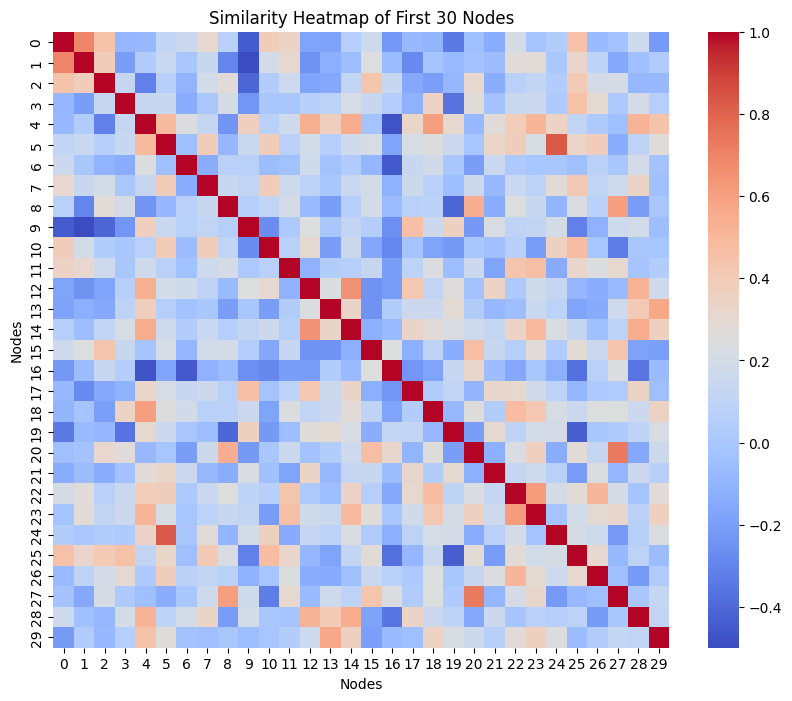

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample a subset for clarity
subset_embeddings = all_embeddings[:30].numpy()  # First 30 nodes
sim_matrix = cosine_similarity(subset_embeddings)

plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, cmap='coolwarm', square=True)
plt.title("Similarity Heatmap of First 30 Nodes")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.show()


In [ ]:
# Step 1: Run the model on the full graph

model.eval()
with torch.no_grad():
    all_embeddings = model(data)  # Shape: (num_nodes, 32)

# Step 2: Select some symptom node indices
example_symptom_nodes = [10, 42, 78]  # Make sure these are valid symptom node IDs
symptom_embeddings = all_embeddings[example_symptom_nodes]  # Shape: (3, 32)

# Step 3: Average embeddings to get a profile vector
symptom_profile = symptom_embeddings.mean(dim=0).unsqueeze(0)  # Shape: (1, 32)

# Step 4: Compute similarity to all disease nodes
from sklearn.metrics.pairwise import cosine_similarity

# Optional: Filter out only disease nodes
disease_start_idx = 1000  # Adjust based on your graph design
disease_embeddings = all_embeddings[disease_start_idx:]  # Shape: (num_diseases, 32)

# Step 5: Compute cosine similarity
similarities = cosine_similarity(symptom_profile.numpy(), disease_embeddings.numpy()).flatten()

# Step 6: Top-K predictions
top_k = 5
top_indices = similarities.argsort()[-top_k:][::-1]
predicted_disease_nodes = disease_start_idx + top_indices

# Step 7: Map to disease names (if available)
for i, node in enumerate(predicted_disease_nodes):
    disease_name = diseases_df[diseases_df['did'] == node]['diagnose'].values
    name_str = disease_name[0] if len(disease_name) else "Unknown"
    print(f"{i+1}. Disease Node ID: {node} | Name: {name_str} | Similarity: {similarities[top_indices[i]]:.4f}")


1. Disease Node ID: 1093 | Name: Brucellosisbacterial infection spread from animals | Similarity: 0.4530
2. Disease Node ID: 1001 | Name: Angioedemaswelling of skin, lips, eyes | Similarity: 0.4346
3. Disease Node ID: 1100 | Name: Facial nerve paralysis | Similarity: 0.4306
4. Disease Node ID: 1053 | Name: Tendon lacerationtendon cut | Similarity: 0.4286
5. Disease Node ID: 1159 | Name: Unknown | Similarity: 0.4163


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity

def hybrid_predict(symptom_ids, weights_dict, model, data, disease_df, symptom_df, top_k=5, disease_start_id=1000):
    model.eval()

    # Step 1: Get all node embeddings from the trained GNN
    with torch.no_grad():
        all_embeddings = model(data)  # (num_nodes, output_dim)
        all_embeddings = F.normalize(all_embeddings, dim=1)  # Normalize for cosine similarity

    # Step 2: Create weighted symptom profile vector
    symptom_embeddings = []
    weights = []

    for sid in symptom_ids:
        if sid < all_embeddings.size(0):  # Valid node
            symptom_embeddings.append(all_embeddings[sid])
            weights.append(weights_dict.get(sid, 1.0))  # default weight 1.0

    if not symptom_embeddings:
        return "No valid symptoms provided."

    symptom_embeddings = torch.stack(symptom_embeddings)
    weights_tensor = torch.tensor(weights).unsqueeze(1)

    symptom_profile = torch.sum(symptom_embeddings * weights_tensor, dim=0) / torch.sum(weights_tensor)
    symptom_profile = symptom_profile.unsqueeze(0)

    # Step 3: Compute cosine similarity to all nodes
    similarities = cosine_similarity(symptom_profile.numpy(), all_embeddings.numpy()).flatten()

    # Step 4: Get top-K disease predictions
    disease_ids = disease_df['did'].tolist()
    disease_sims = [(i, similarities[i]) for i in disease_ids]
    top_diseases = sorted(disease_sims, key=lambda x: x[1], reverse=True)[:top_k]

    # Step 5: Output results with names
    print("🧠 Predicted Diseases (GNN Hybrid Model Output):")
    for did, sim in top_diseases:
        name = disease_df.loc[disease_df['did'] == did, 'diagnose'].values[0]
        print(f"{name} (Node ID {did}) → Similarity: {sim:.4f}")

    return top_diseases


In [ ]:
def hybrid_predict(symptom_ids, weights_dict, model, data, disease_df, symptom_df, top_k=5):
    input_dim = data.x.shape[1]
    symptom_profile = torch.zeros((1, input_dim))

    for sid in symptom_ids:
        idx = symptom_df[symptom_df['syd'] == sid].index
        if not idx.empty:
            node_idx = idx[0]
            symptom_profile += weights_dict[sid] * data.x[node_idx]

    model.eval()
    with torch.no_grad():
        # GNN embedding for all nodes
        all_embeddings = model(data)  # Shape: (num_nodes, 32)

        # Project symptom profile using same layers
        projected = model.conv1(symptom_profile, data.edge_index[:, :1])  # dummy edge_index
        projected = torch.relu(projected)
        projected = model.conv2(projected, data.edge_index[:, :1])  # Still a dummy to reuse weights
        symptom_embedding = projected  # Shape: (1, 32)

    # Now compare in same embedding space
    similarities = cosine_similarity(symptom_embedding.numpy(), all_embeddings.numpy()).flatten()

    # Rank diseases
    top_k_predictions = []
    for i in range(len(disease_df)):
        disease_name = disease_df.iloc[i]['Disease']
        node_index = disease_df.index[i]
        if node_index < len(similarities):
            similarity = similarities[node_index]
            top_k_predictions.append((disease_name, similarity))

    top_k_predictions.sort(key=lambda x: x[1], reverse=True)
    return top_k_predictions[:top_k]


In [ ]:
# Example input
input_symptoms = ['headache', 'nausea']
symptom_ids = [symptoms_df[symptoms_df['symptom'] == s]['syd'].values[0] for s in input_symptoms if not symptoms_df[symptoms_df['symptom'] == s].empty]
weights_dict = {sid: 0.8 for sid in symptom_ids}  # arbitrary weight

# Make predictions
if symptom_ids:
    predicted = hybrid_predict(symptom_ids, weights_dict, model, data, diseases_df, symptoms_df)
    print("Top Predicted Diseases:")
    for disease, score in predicted:
        print(f"{disease}: {score:.4f}")
else:
    print("No valid symptoms found in the dataset.")


RuntimeError: index 156 is out of bounds for dimension 0 with size 1

In [ ]:
def get_treatments_for_symptoms(symptom_list, model, data, diseases_df, symptoms_df, top_k=3):
    # Step 1: Get symptom IDs
    symptom_ids = []
    for s in symptom_list:
        matches = symptoms_df[symptoms_df['symptom'].str.lower() == s.lower()]
        if not matches.empty:
            sid = matches.iloc[0]['syd']
            symptom_ids.append(sid)

    if not symptom_ids:
        print("No matching symptoms found.")
        return []

    # Step 2: Assign uniform weights (you can also customize this)
    weights_dict = {sid: 1.0 for sid in symptom_ids}

    # Step 3: Predict top diseases
    top_diseases = hybrid_predict(symptom_ids, weights_dict, model, data, diseases_df, symptoms_df, top_k)

    # Step 4: Map diseases to treatments
    results = []
    for disease_name, score in top_diseases:
        treatment = diseases_df[diseases_df['Disease'] == disease_name]['Treatment'].values
        treatment = treatment[0] if len(treatment) > 0 else "No treatment info available"
        results.append((disease_name, score, treatment))

    return results


In [ ]:
input_symptoms = ['headache', 'nausea']
recommendations = get_treatments_for_symptoms(input_symptoms, model, data, diseases_df, symptoms_df)

for disease, similarity, treatment in recommendations:
    print(f"Disease: {disease}\nSimilarity: {similarity:.2f}\nTreatment: {treatment}\n")


RuntimeError: index 156 is out of bounds for dimension 0 with size 1